# <span style='color: Yellow;'>Import Libraries</h1>

In [50]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl
%matplotlib inline
import operator
import itertools

# <span style='color: Yellow;'>Import Dataset</span>

In [51]:
data = pd.read_csv('./data.csv')
data.head(10)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


# <span style='color: Yellow;'>Checking out the Columns</span>

In [52]:
list(data.columns)

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

# <span style='color: Yellow;'>Count of TV Shows and Movies</span>

C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\123084172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.countplot(x="type", data=data, palette='Set2')


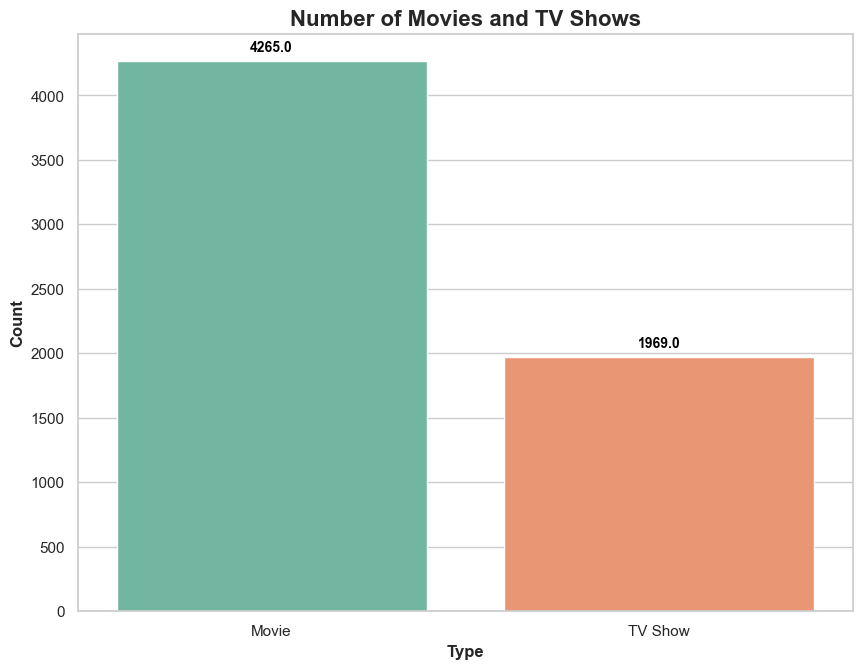

In [53]:
sb.set(style="whitegrid", palette="pastel")

# Create a figure with a specific size
pl.figure(figsize=(10, 7.5))

# Create a countplot for the 'type' variable
ax = sb.countplot(x="type", data=data, palette='Set2')

# Add title
pl.title('Number of Movies and TV Shows', fontsize=16, weight='bold')

# Add labels
pl.xlabel('Type', fontsize=12, weight='bold')
pl.ylabel('Count', fontsize=12, weight='bold')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points',
                color='black',  # Text color
                fontsize=10,  # Text font size
                weight='bold'  # Text weight
                )

# Save the plot with tight layout
pl.savefig('./graphs/movies_series_count', bbox_inches='tight')

Netflix has more number of Movies than Shows

# <span style='color: Yellow;'>Coutries with most number of Shows and Series</span>

C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\196884407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  aa=sb.countplot(data=data, x = 'country', order=data['country'].value_counts().index[0:10], palette="deep")


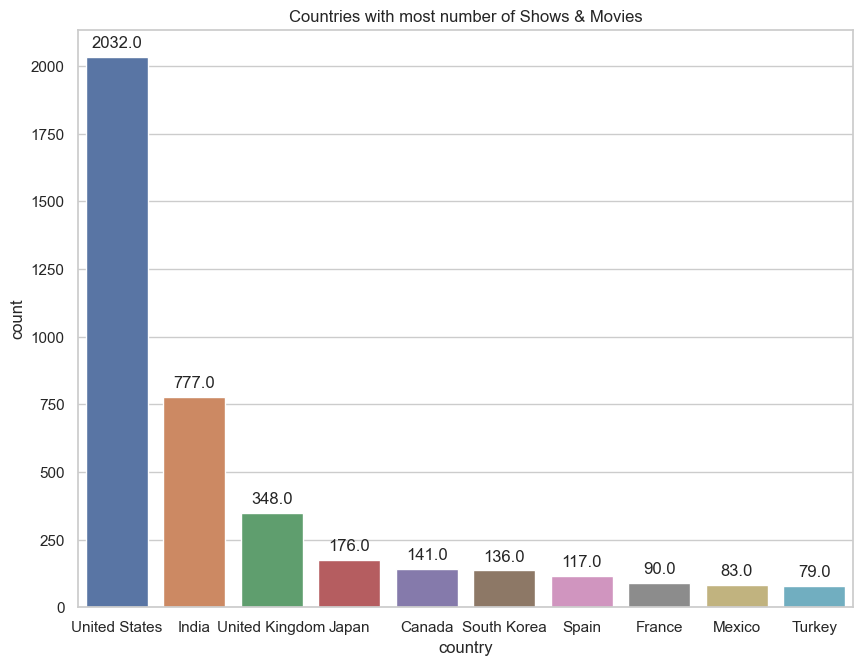

In [54]:
pl.figure(figsize=(10,7.5) )
pl.title('Countries with most number of Shows & Movies')
aa=sb.countplot(data=data, x = 'country', order=data['country'].value_counts().index[0:10], palette="deep")
for p in aa.patches:
    aa.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


pl.savefig('./graphs/mostshows_countrywise')

US has most number of shows and movies

# <span style='color: Yellow;'>Movies List</span>

In [55]:
movie = data[data['type']=='Movie']
movie.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."
12,80182480,Movie,Krish Trish and Baltiboy,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2013,TV-Y7,62 min,Children & Family Movies,"An artisan is cheated of his payment, a lion o..."


# <span style='color: Yellow;'>Directors with most number of movies</span>

C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\3609262909.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ab = sb.countplot(y='director', data=movie, order=movie['director'].value_counts().index[0:10], palette='Set3')


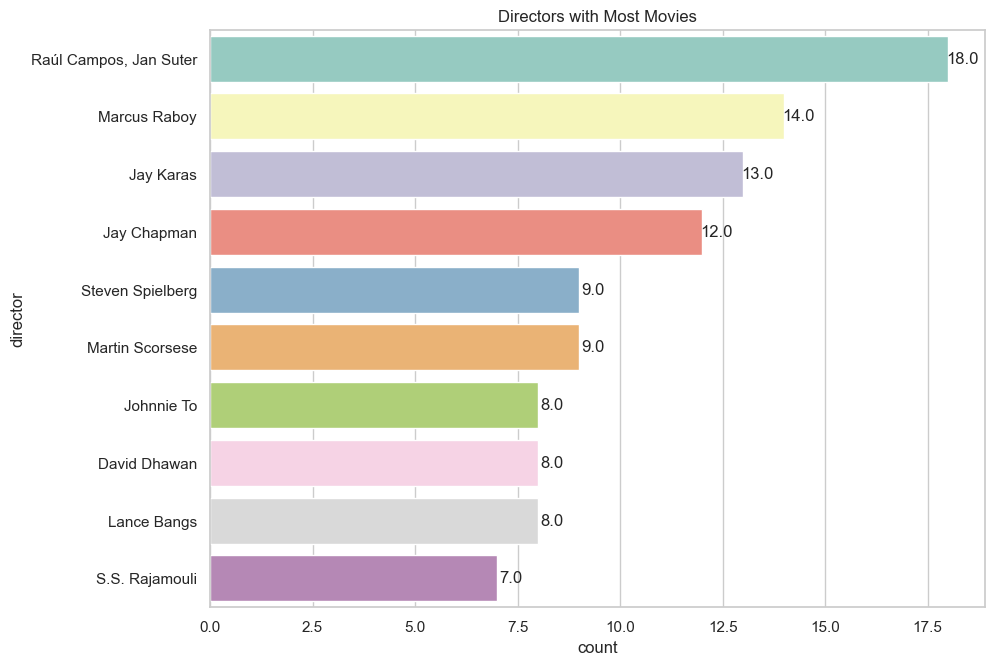

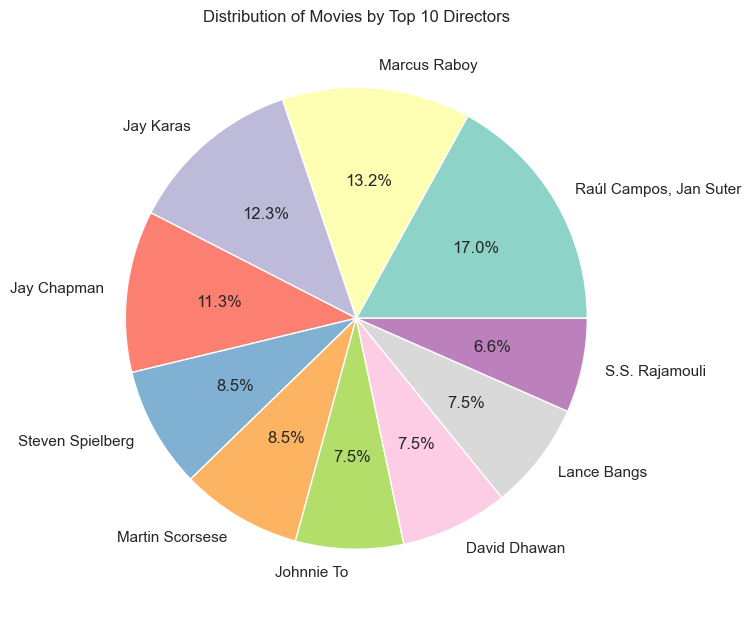

In [56]:
pl.figure(figsize=(10, 7.5))
pl.title('Directors with Most Movies')

# Assuming 'director' is a categorical variable
ab = sb.countplot(y='director', data=movie, order=movie['director'].value_counts().index[0:10], palette='Set3')

# Annotate the bars with their counts
for p in ab.patches:
    ab.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

# Save the bar plot
pl.savefig('./graphs/Directorswithmostmovies')

# Create a pie chart using the same data
pl.figure(figsize=(10, 7.5))
pl.title('Distribution of Movies by Top 10 Directors')

# Extract data for the pie chart
director_counts = movie['director'].value_counts().head(10)

# Create a pie chart
pl.pie(director_counts, labels=director_counts.index, autopct='%1.1f%%', colors=sb.color_palette('Set3'))

# Save the pie chart
pl.savefig('./graphs/DirectorsPieChart')

Raul Campos and Jan Suter have directed more number of movies than other directors

# <span style='color: Yellow;'>TOP 10 YEARS WITH THE MOST SHOWS</span>

C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\1017941850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ad = sb.countplot(y='release_year', data=data, order=data['release_year'].value_counts().index[0:10], palette='Set2')


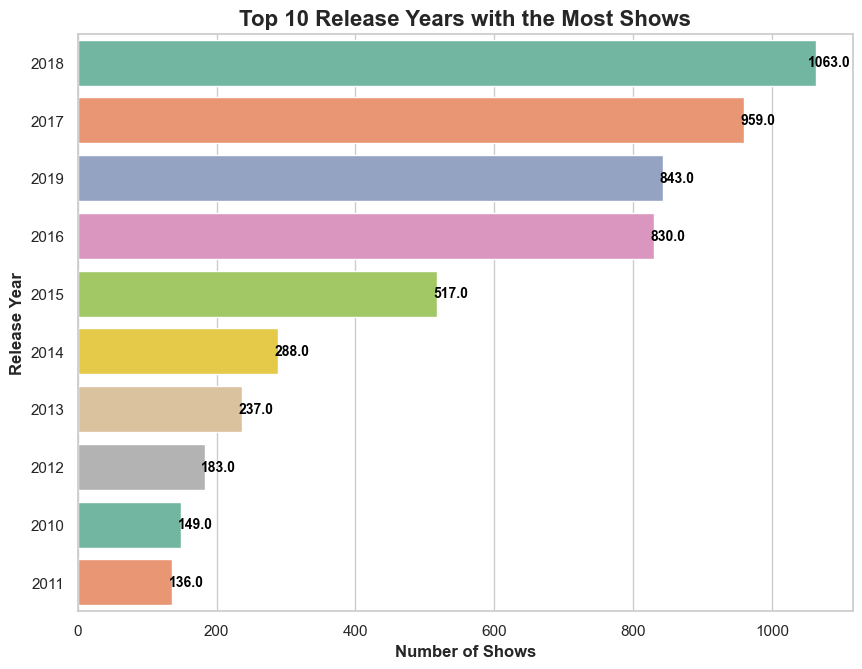

In [57]:
pl.figure(figsize=(10, 7.5))

# Set Seaborn style
sb.set(style='whitegrid', palette='pastel')

# Create the countplot
ad = sb.countplot(y='release_year', data=data, order=data['release_year'].value_counts().index[0:10], palette='Set2')

# Annotate the bars with their counts
for p in ad.patches:
    ad.annotate(f'{p.get_width()}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center',
                xytext=(10, 0), textcoords='offset points',
                color='black',  # Text color
                fontsize=10,  # Text font size
                weight='bold'  # Text weight
                )

# Customize the plot
pl.xlabel('Number of Shows', fontsize=12, weight='bold')
pl.ylabel('Release Year', fontsize=12, weight='bold')
pl.title('Top 10 Release Years with the Most Shows', fontsize=16, weight='bold')

# Save the plot with tight layout
pl.savefig('./graphs/Year&Shows', bbox_inches='tight')

# <span style='color: Yellow;'>AVERAGE DURATION OF MOVIES IN NETFLIX</span>

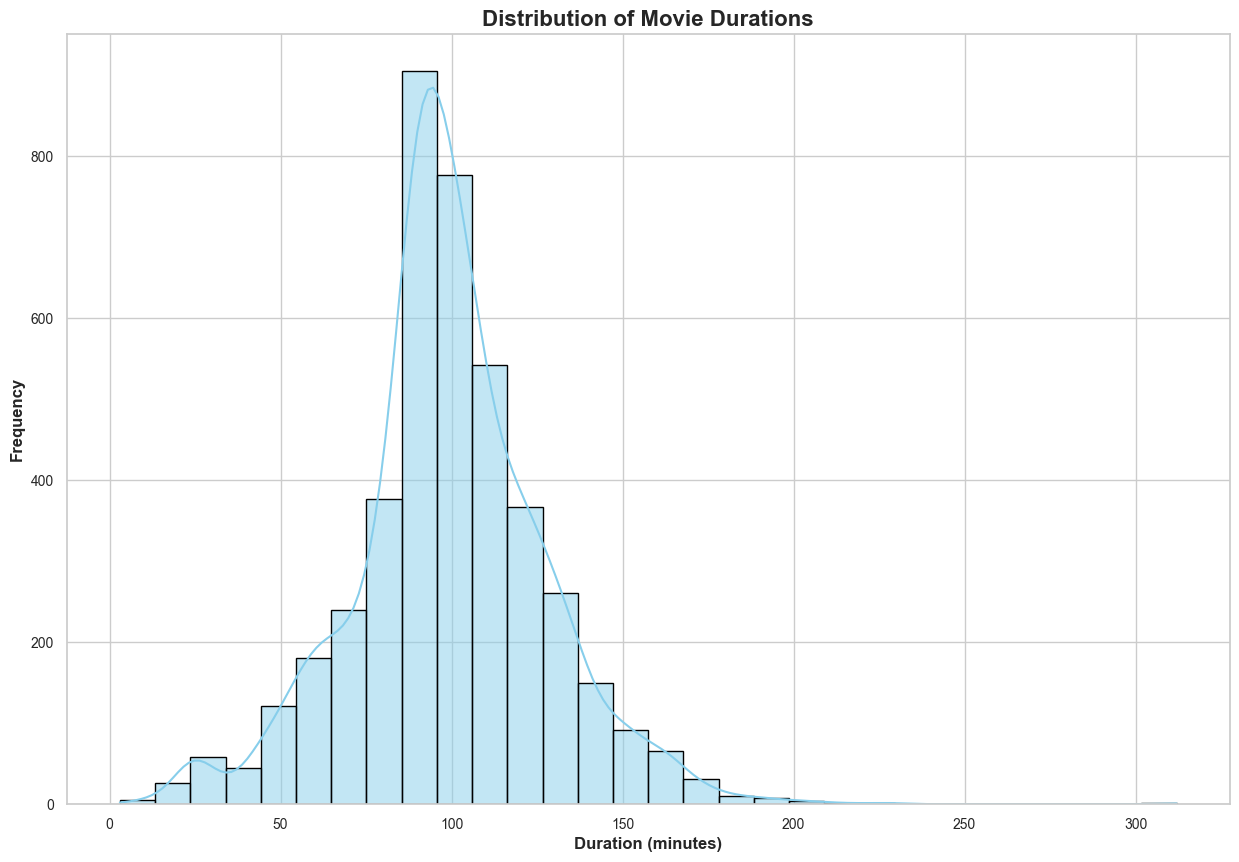

In [58]:
duration = [int(i.strip('min')) for i in movie['duration']]

# Set Seaborn style
sb.set(style='whitegrid', palette='muted')

# Create a figure with a specific size
pl.figure(figsize=(15, 10))

# Plot the distribution using a KDE plot
sb.histplot(duration, kde=True, bins=30, color='skyblue', edgecolor='black')

# Add title and labels
pl.title("Distribution of Movie Durations", fontsize=16, weight='bold')
pl.xlabel("Duration (minutes)", fontsize=12, weight='bold')
pl.ylabel("Frequency", fontsize=12, weight='bold')

# Customize tick labels for better readability
pl.xticks(fontsize=10)
pl.yticks(fontsize=10)

# Save the plot with tight layout
pl.savefig('./graphs/MovieDuration_Avg', bbox_inches='tight')

# <span style='color: Yellow;'>TOP MOVIE GENRES</span>

In [59]:
genrePerMovie=[]
totalMoveGenre = []
setGenre = set()
set1 = set()
for i in movie['listed_in']:
    if(type(i)==str):
        g = i.split(',')
        for genre in g:
            setGenre.add(genre.strip())

In [60]:
totalMovieGenre = list(setGenre)

In [61]:
%%time
storeCountOfGenre = {}
currentGenre = []
for actualGenre in totalMovieGenre:
    count = 1
    for i in movie['listed_in']:
        currentGenre = []
        if(type(i)==str):
            s=i.split(',')
            for j in s:
                currentGenre.append(j.strip())
            if(actualGenre in currentGenre):
                if actualGenre not in storeCountOfGenre:
                    storeCountOfGenre[actualGenre] = 1
                else:
                    storeCountOfGenre[actualGenre] +=1

CPU times: total: 266 ms
Wall time: 256 ms


In [62]:
sorted_Genre = dict(sorted(storeCountOfGenre.items(), key=operator.itemgetter(1),reverse=True))
finalSortedListOfGenre = dict(itertools.islice(sorted_Genre.items(),10))

keysGenre = list(finalSortedListOfGenre.keys())
keysGenre = keysGenre[1:]
valuesGenre = list(finalSortedListOfGenre.values())
valuesGenre = valuesGenre[1:]

C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\4285453389.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('viridis')  # Changed colormap for aesthetics
C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\4285453389.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(keysGenre, rotation=45, ha='right')  # Rotated and aligned x-axis labels


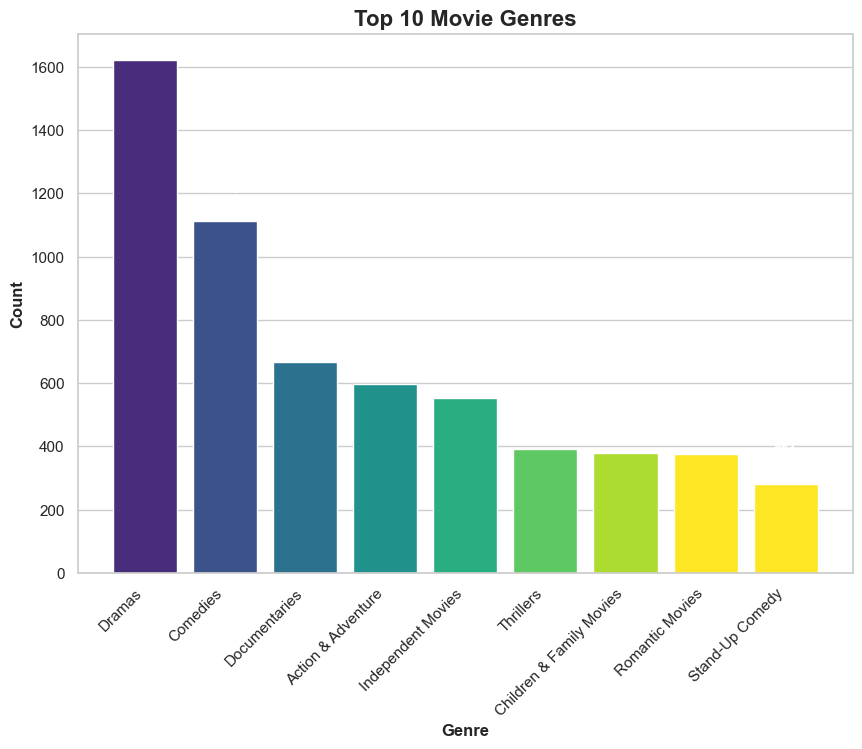

In [63]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize
dataColorGenre = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
my_cmap = cm.get_cmap('viridis')  # Changed colormap for aesthetics
my_norm = Normalize(vmin=0, vmax=8)

fig, ax = pl.subplots(figsize=(10, 7))

# Plot the bars
bars = ax.bar(keysGenre, valuesGenre, color=my_cmap(my_norm(dataColorGenre)))

# Display the values on top of the bars with additional styling
for bar, value in zip(bars, valuesGenre):
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 0.05 * max(valuesGenre),  # Adjusted the vertical position for better readability
        f'{round(value, 2)}',  # Added f-string formatting
        ha='center',
        va='bottom',
        color='white',  # Text color
        fontsize=10,  # Text font size
        weight='bold'  # Text weight
    )

# Customize the plot
ax.set_xticklabels(keysGenre, rotation=45, ha='right')  # Rotated and aligned x-axis labels
ax.set_ylabel('Count', fontsize=12, weight='bold')  # Adjusted font size and weight
ax.set_xlabel('Genre', fontsize=12, weight='bold')  # Adjusted font size and weight
ax.set_title('Top 10 Movie Genres', fontsize=16, weight='bold')  # Adjusted font size and weight

# Remove x-axis grid lines for better aesthetics
ax.xaxis.grid(False)

# Save the plot
pl.savefig('./graphs/Genre', bbox_inches='tight')  

# <span style='color: Yellow;'>TV SHOWS</span>

In [64]:
data = pd.read_csv('./data.csv')
series = data[data['type']=='TV Show']
series.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


# <span style='color: Yellow;'>NUMBER OF SEASONS IN A TV SHOW</span>

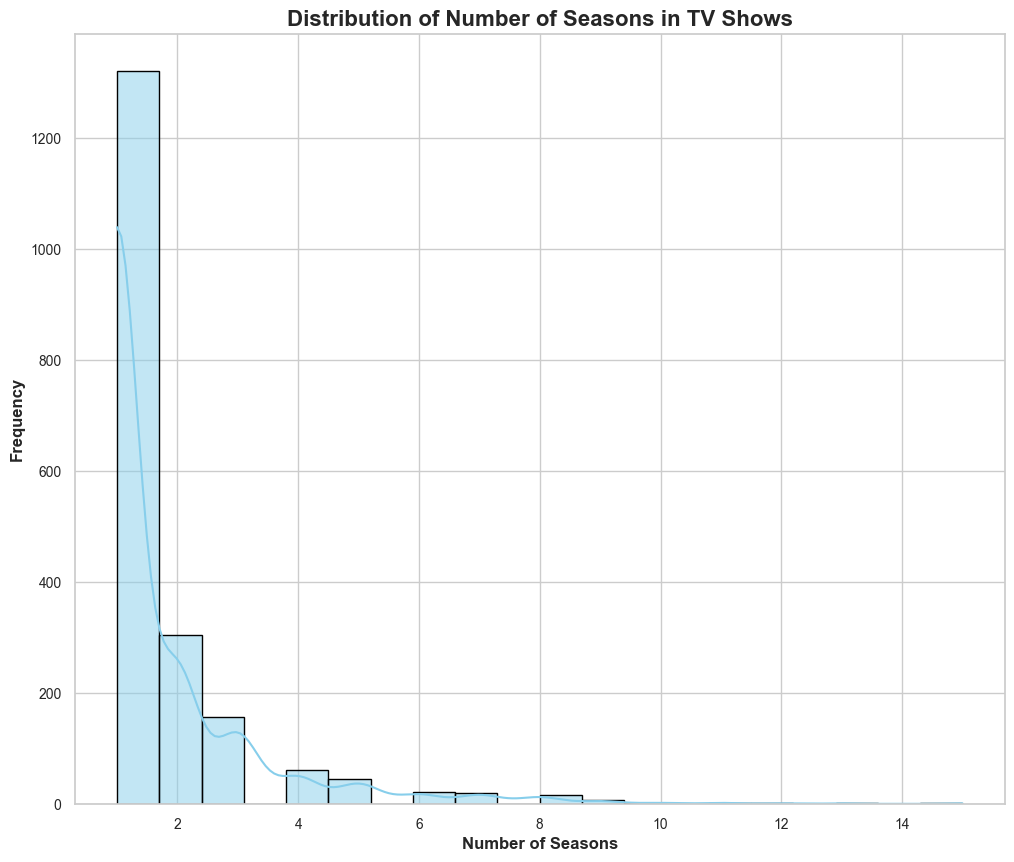

In [65]:
tvshow = series[series['duration'].notna()]
duration_series = [int(i.strip('Season')) for i in tvshow['duration']]

# Set Seaborn style
sb.set(style='whitegrid', palette='muted')

# Create a figure with a specific size
pl.figure(figsize=(12, 10))

# Plot the distribution using a KDE plot
sb.histplot(duration_series, kde=True, bins=20, color='skyblue', edgecolor='black')

# Add title and labels
pl.title('Distribution of Number of Seasons in TV Shows', fontsize=16, weight='bold')
pl.xlabel('Number of Seasons', fontsize=12, weight='bold')
pl.ylabel('Frequency', fontsize=12, weight='bold')

# Customize tick labels for better readability
pl.xticks(fontsize=10)
pl.yticks(fontsize=10)

# Save the plot with tight layout
pl.savefig('./graphs/AvgNumOfShows', bbox_inches='tight')

# <span style='color:yellow;'>TOP TV GENRES</span>

In [66]:
genrePerShow=[]
totalGenreShow = []
setGenreShow = set()
setShowGenre = set()
for i in series['listed_in']:
    if(type(i)==str):
        g = i.split(',')
        for genre in g:
            setShowGenre.add(genre.strip())
            
totalShowGenre = list(setShowGenre)
len(totalShowGenre)

22

In [67]:
%%time
storeCountOfShowGenre = {}
currentShowGenre = []
for actualShowGenre in totalShowGenre:
    for i in series['listed_in']:
        currentShowGenre = []
        if(type(i)==str):
            s=i.split(',')
            for j in s:
                currentShowGenre.append(j.strip())
            if(actualShowGenre in currentShowGenre):
                if actualShowGenre not in storeCountOfShowGenre:
                    storeCountOfShowGenre[actualShowGenre] = 1
                else:
                    storeCountOfShowGenre[actualShowGenre] +=1

CPU times: total: 141 ms
Wall time: 139 ms


In [68]:
sortedShowGenre = dict(sorted(storeCountOfShowGenre.items(), key=operator.itemgetter(1),reverse=True))
finalSortedListOfShowGenre = dict(itertools.islice(sortedShowGenre.items(),11))

keysShowGenre = list(finalSortedListOfShowGenre.keys())
keysShowGenre = keysShowGenre[1:]

valuesShowGenre = list(finalSortedListOfShowGenre.values())
valuesShowGenre = valuesShowGenre[1:]

C:\Users\jayan\AppData\Local\Temp\ipykernel_18452\3845053499.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = cm.get_cmap('ocean')


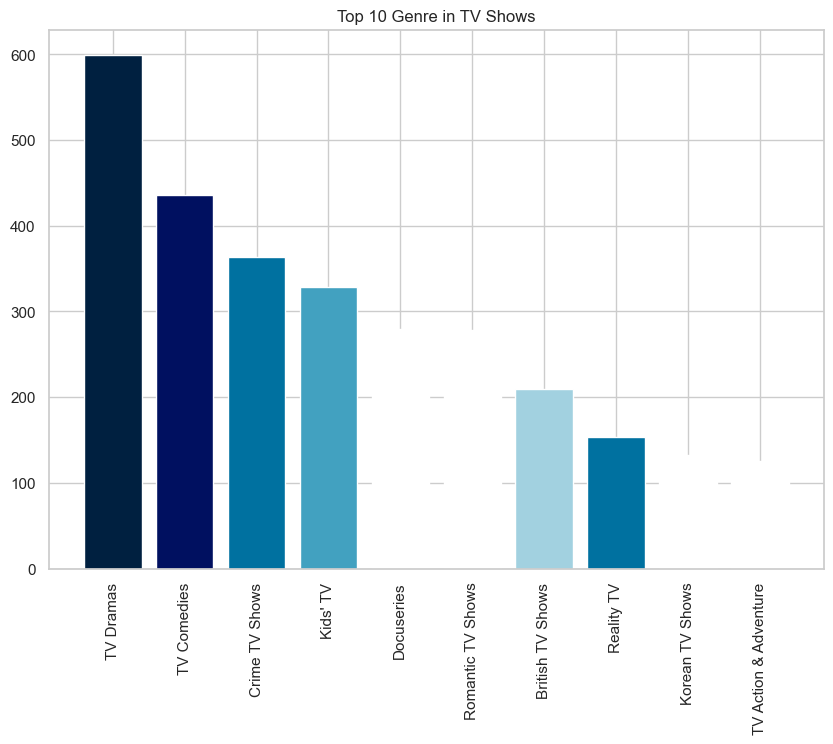

In [69]:
dataColorGenre = [2, 3, 5, 6, 8, 12, 7, 5,9,11,10,4]
my_cmap = cm.get_cmap('ocean')
my_norm = Normalize(vmin=0, vmax=8)

pl.figure(figsize=(10,7))
pl.bar(keysShowGenre, valuesShowGenre, color=my_cmap(my_norm(dataColorGenre)))
pl.title("Top 10 Genre in TV Shows")
pl.xticks(rotation=90)
pl.show()